<a href="https://colab.research.google.com/github/armandordorica/APS1070_A1/blob/master/Project_1_APS_1070.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# APS1070
#### Basic Principles and Models - Project 1
**Deadline: May 28, 23:00 - 14 points**

**Academic Integrity**

This project is individual - it is to be completed on your own. If you have questions, please post your query in the APS1070 Piazza Q&A forums (the answer might be useful to others!).

Do not share your code with others, or post your work online. Do not submit code that you have not written yourself. Students suspected of plagiarism on a project, midterm or exam will be referred to the department for formal discipline for breaches of the Student Code of Conduct.

Name: Armando Ordorica  *(here and elsewhere, please replace the underscore with your answer)*

Student ID: 1005592164

##**Marking Scheme:**

This project is worth **14 marks** of your final grade.

Draw a plot or table where necessary to summarize your findings. 

**Practice Vectorized coding**: If you need to write a loop in your solution, think about how you can implement the same functionality with vectorized operations. Try to avoid loops as much as possible (in some cases, loops are inevitable).



# Project 1 [14 Marks] 
Let's take the tools we have learned in the tutorial and put them into practice on a new dataset.

We're going to work with a breast cancer dataset. Download it using the cell below:

## Part 1: Getting started [6 Marks]
First off, take a look at the `data`, `target` and `feature_names` entries in the `dataset` dictionary. They contain the information we'll be working with here. Then, create a Pandas DataFrame called `df` containing the data and the targets, with the feature names as column headings. If you need help, refer [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) for more details on how to achieve this. **[1]**
* How many features do we have in this dataset? 30
* What are the target classes? malign and benign
* What do these target classes signify?  whether a tumor is classified as benign or malign 
* How many participants tested `Malignant`? 212 - Malignant, 
* How many participants tested `Benign`? 357 - Benign

In [0]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()

In [0]:
dataset.data.shape

(569, 30)

In [0]:
len(dataset.feature_names)

30

In [0]:
dataset.target_names

array(['malignant', 'benign'], dtype='<U9')

In [0]:
cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [0]:
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
df.groupby("target").count()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.0,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212,212
1.0,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357,357


Use `seaborn.lmplot` ([help here](https://seaborn.pydata.org/generated/seaborn.lmplot.html)) to visualize a few features of the dataset. Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class. Do this once again for different features for the x- and y-axis and see how the data is distributed. **[2]**

Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. **[2]**

Standardize the data and plot those features again. **[1]**

**Draw a plot where the x-axis is "mean radius", the y-axis is "mean texture," and the color of each datapoint indicates its class.**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['mean radius', 'mean texture']

# # Get dataframe for data
# df2 = pd.DataFrame(df, columns=columns)

size_of_point = 20

# Plot
sns.lmplot(*columns, data=df, fit_reg=True, legend=True, hue='target', scatter_kws={'s': size_of_point})
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Do this once again for different features for the x- and y-axis and see how the data is distributed.**

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['mean perimeter', 'mean area']

# # Get dataframe for data
# df2 = pd.DataFrame(df, columns=columns)

size_of_point = 20

# Plot
sns.lmplot(*columns, data=df, fit_reg=True, legend=True, hue='target', scatter_kws={'s': size_of_point})
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Standardizing the data is often critical in machine learning. Show a plot as above, but with two features with very different scales. **[2]****

In [0]:
df['mean_radius_altered'] = df['mean radius']*0.08
df['mean_texture_altered'] = df['mean texture']*100

In [0]:

columns = ['mean_radius_altered', 'mean_texture_altered']

# # Get dataframe for data
# df2 = pd.DataFrame(df, columns=columns)

size_of_point = 20

# Plot
sns.lmplot(*columns, data=df, fit_reg=True, legend=True, hue='target', scatter_kws={'s': size_of_point})
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Standardize the data and plot those features again. **[1]****

In [0]:
import pandas as pd
from sklearn import preprocessing

x = df['mean radius'].values #returns a numpy array
x.shape[0]
# x = x.reshape(1, -1)
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
x_scaled = min_max_scaler.fit_transform(x.reshape(x.shape[0], -1))
x_scaled
df_mean_radius = pd.DataFrame(x_scaled)
df_mean_radius

,0
0,0.521037
1,0.643144
2,0.601496
3,0.210090
4,0.629893
...,...
564,0.690000
565,0.622320
566,0.455251
567,0.644564


In [0]:

x = df['mean radius'].values #returns a numpy array
mean_normalized_x = (x-x.mean())/x.std()

df['mean radius normalized'] = mean_normalized_x

mean_normalized_x.min(), mean_normalized_x.max()

(-2.0296483039857525, 3.9712876465451097)

In [0]:
y = df['mean texture'].values #returns a numpy array
mean_normalized_y = (y-y.mean())/y.std()

df['mean texture normalized'] = mean_normalized_y

mean_normalized_y.min(), mean_normalized_y.max()

(-2.2292485121703924, 4.651888980771197)

In [0]:
columns = ['mean radius normalized', 'mean texture normalized']

size_of_point = 20

# Plot
sns.lmplot(*columns, data=df, fit_reg=False, legend=False, hue='target', scatter_kws={'s': size_of_point})
plt.show() 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Part 2: KNN Classifier [2 Marks]
We are going to create a KNN classifier to predict whether a patient has a malignant or benign tumor. 


It is best practice to have a training set (from which there is a rotating validation subset) and test set. The main aim here is to obtain the best accuracy we can on the test set. To tune `k` (our hyperparameter), we employ cross-validation ([Help](https://scikit-learn.org/stable/modules/cross_validation.html)). Cross-validation automatically selects validation subsets from the data you send it (each of the folds is used as validation).

First, split the dataset into a train and a test set (80:20). The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete.
Follow these steps: **[2]**

* Using cross-validation, report mean cross-validation accuracy for a KNN classifier where you sweep k from 1 to 100. **Report your findings on a plot.**

* Base on this plot (that you just ran), find the best 'k' and report your test accuracy.

* Randomly select 5 different 'k', and use them on the test set to see if the cross-validation really found a good 'k' for us.


**1.First, split the dataset into a train and a test set (80:20). The test set is set aside (untouched) for final evaluation, once hyperparameter optimization is complete.**

In [0]:
len(df)*0.8

455.20000000000005

In [0]:
len(df.columns)

35

In [0]:
X = df.loc[:, df.columns != 'target']
y = df['target']

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
# >>> X, y = np.arange(10).reshape((5, 2)), range(5)
# >>> X
# array([[0, 1],
#        [2, 3],
#        [4, 5],
#        [6, 7],
#        [8, 9]])
# >>> list(y)
# [0, 1, 2, 3, 4]



In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [0]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,mean_radius_altered,mean_texture_altered,mean radius normalized,mean texture normalized
68,9.029,17.33,58.79,250.5,0.10660,0.14130,0.31300,0.04375,0.2111,0.08046,0.3274,1.1940,1.8850,17.67,0.009549,0.086060,0.303800,0.033220,0.04197,0.009559,10.310,22.65,65.50,324.7,0.14820,0.43650,1.25200,0.17500,0.4228,0.11750,0.72232,1733.0,-1.447987,-0.456023
181,21.090,26.57,142.70,1311.0,0.11410,0.28320,0.24870,0.14960,0.2395,0.07398,0.6298,0.7629,4.4140,81.46,0.004253,0.047590,0.038720,0.015670,0.01798,0.005295,26.680,33.48,176.50,2089.0,0.14910,0.75840,0.67800,0.29030,0.4098,0.12840,1.68720,2657.0,1.977508,1.694187
63,9.173,13.86,59.20,260.9,0.07721,0.08751,0.05988,0.02180,0.2341,0.06963,0.4098,2.2650,2.6080,23.52,0.008738,0.039380,0.043120,0.015600,0.04192,0.005822,10.010,19.23,65.59,310.1,0.09836,0.16780,0.13970,0.05087,0.3282,0.08490,0.73384,1386.0,-1.407089,-1.263516
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,0.2497,1.4930,1.4970,16.64,0.007189,0.010350,0.010810,0.006245,0.02158,0.002619,12.250,35.19,77.98,455.7,0.14990,0.13980,0.11250,0.06136,0.3409,0.08147,0.85200,2522.0,-0.987600,1.380033
60,10.170,14.88,64.55,311.9,0.11340,0.08061,0.01084,0.01290,0.2743,0.06960,0.5158,1.4410,3.3120,34.62,0.007514,0.010990,0.007665,0.008193,0.04183,0.005953,11.020,17.45,69.86,368.6,0.12750,0.09866,0.02168,0.02579,0.3557,0.08020,0.81360,1488.0,-1.123927,-1.026155
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,8.888,14.64,58.79,244.0,0.09783,0.15310,0.08606,0.02872,0.1902,0.08980,0.5262,0.8522,3.1680,25.44,0.017210,0.093680,0.056710,0.017660,0.02541,0.021930,9.733,15.67,62.56,284.4,0.12070,0.24360,0.14340,0.04786,0.2254,0.10840,0.71104,1464.0,-1.488033,-1.082004
106,11.640,18.33,75.17,412.5,0.11420,0.10170,0.07070,0.03485,0.1801,0.06520,0.3060,1.6570,2.1550,20.62,0.008540,0.023100,0.029450,0.013980,0.01565,0.003840,13.140,29.26,85.51,521.7,0.16880,0.26600,0.28730,0.12180,0.2806,0.09097,0.93120,1833.0,-0.706426,-0.223317
270,14.290,16.82,90.30,632.6,0.06429,0.02675,0.00725,0.00625,0.1508,0.05376,0.1302,0.7198,0.8439,10.77,0.003492,0.003710,0.004826,0.003608,0.01536,0.001381,14.910,20.65,94.44,684.6,0.08567,0.05036,0.03866,0.03333,0.2458,0.06120,1.14320,1682.0,0.046211,-0.574704
435,13.980,19.62,91.12,599.5,0.10600,0.11330,0.11260,0.06463,0.1669,0.06544,0.2208,0.9533,1.6020,18.85,0.005314,0.017910,0.021850,0.009567,0.01223,0.002846,17.040,30.80,113.90,869.3,0.16130,0.35680,0.40690,0.18270,0.3179,0.10550,1.11840,1962.0,-0.041833,0.076875


In [0]:
y_train

68     1.0
181    0.0
63     1.0
248    1.0
60     1.0
      ... 
71     1.0
106    1.0
270    1.0
435    0.0
102    1.0
Name: target, Length: 455, dtype: float64

**Using cross-validation, report mean cross-validation accuracy for a KNN classifier where you sweep k from 1 to 100. **Report your findings on a plot.****

In [0]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Choosing n_neighbors to be roughly sqrt(N) where N is the size of the training set
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix


ks = []
accuracies = []
for k in range(1,100): 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

  sc = StandardScaler()

  X_train = sc.fit_transform(X_train)
  X_test = sc.fit_transform(X_test)


  classifier = KNeighborsClassifier(n_neighbors=k, metric = 'minkowski', p =2, algorithm = "ball_tree")
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)

  accuracy = classifier.score(X_test, y_test)
  ks.append(k)
  accuracies.append(accuracy)
  print("k:{}, accuracy:{}".format(k, accuracy))


k:1, accuracy:0.956140350877193
k:2, accuracy:0.9385964912280702
k:3, accuracy:0.9824561403508771
k:4, accuracy:0.9736842105263158
k:5, accuracy:0.9736842105263158
k:6, accuracy:0.9385964912280702
k:7, accuracy:0.9210526315789473
k:8, accuracy:0.9736842105263158
k:9, accuracy:0.9649122807017544
k:10, accuracy:0.956140350877193
k:11, accuracy:0.9649122807017544
k:12, accuracy:0.9824561403508771
k:13, accuracy:0.9736842105263158
k:14, accuracy:0.9035087719298246
k:15, accuracy:0.9824561403508771
k:16, accuracy:0.9473684210526315
k:17, accuracy:0.9473684210526315
k:18, accuracy:0.956140350877193
k:19, accuracy:0.9473684210526315
k:20, accuracy:0.9210526315789473
k:21, accuracy:0.9824561403508771
k:22, accuracy:0.9824561403508771
k:23, accuracy:0.9473684210526315
k:24, accuracy:0.9385964912280702
k:25, accuracy:0.956140350877193
k:26, accuracy:0.9210526315789473
k:27, accuracy:0.9824561403508771
k:28, accuracy:0.9649122807017544
k:29, accuracy:0.9824561403508771
k:30, accuracy:0.9912280701

In [0]:
plt.plot(ks, accuracies)
plt.ylabel("accuracy")
plt.xlabel("k number of neighbours")

<IPython.core.display.Javascript object>

Text(0.5, 0, 'k number of neighbours')

<IPython.core.display.Javascript object>

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import KFold, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

data = load_breast_cancer()['data']
target = load_breast_cancer()['target']

classifier = KNeighborsClassifier(n_neighbors=24, metric = 'minkowski', p =2, algorithm = "ball_tree")
train, test, target_train, target_test = train_test_split(data, target, test_size=0.25, random_state=0)

for k in range(2, 101): 
  # k = 10
  kfold = KFold(n_splits=k)

  for train_index, test_index in kfold.split(train):
      #print(train_index, test_index)
      X_train, X_test = train[train_index], train[test_index]
      y_train, y_test = target_train[train_index], target_train[test_index]

      classifier = classifier.fit(X_train, y_train)

      y_pred = classifier.predict(X_test)

      matrix = confusion_matrix(y_test, y_pred)

      #print('KN',((matrix[0][0]+matrix[1][1])/len(X_test))*100)


  matrix1 = confusion_matrix(target_test,classifier.predict(test))    
  accuracy = (matrix1[0][0]+matrix1[1][1])/len(target_test)
  accuracy = accuracy*100
  print(k, "Accuracy on test set: {:.2f}".format(accuracy))

2 Accuracy on test set: 93.01
3 Accuracy on test set: 93.01
4 Accuracy on test set: 94.41
5 Accuracy on test set: 94.41
6 Accuracy on test set: 94.41
7 Accuracy on test set: 94.41
8 Accuracy on test set: 94.41
9 Accuracy on test set: 94.41
10 Accuracy on test set: 94.41
11 Accuracy on test set: 94.41
12 Accuracy on test set: 94.41
13 Accuracy on test set: 94.41
14 Accuracy on test set: 94.41
15 Accuracy on test set: 94.41
16 Accuracy on test set: 94.41
17 Accuracy on test set: 94.41
18 Accuracy on test set: 94.41
19 Accuracy on test set: 94.41
20 Accuracy on test set: 94.41
21 Accuracy on test set: 94.41
22 Accuracy on test set: 94.41
23 Accuracy on test set: 94.41
24 Accuracy on test set: 94.41
25 Accuracy on test set: 94.41
26 Accuracy on test set: 94.41
27 Accuracy on test set: 94.41
28 Accuracy on test set: 94.41
29 Accuracy on test set: 94.41
30 Accuracy on test set: 94.41
31 Accuracy on test set: 94.41
32 Accuracy on test set: 94.41
33 Accuracy on test set: 94.41
34 Accuracy on t

## Part 3: Playing with the features [3 Marks]
In the last practice, we used all the features in our dataset to classify the tumors. Now we want to see:  **[3]**
* Are all of these features necessary to get the same level of accuracy on the test set? No 
* Is it possible to get better accuracy with fewer features? Yes 
* Which features are essential to get 95\% of the accuracy? The minimum number of features is desired. By selecting the features ```'mean concave points', 'worst perimeter', 'worst area', 'worst concave points'```  we can achieve an accuracy of 95% as shown below. By going down to `n=3` we only get the variables ```'mean concave points', 'worst perimeter', 'worst concave points'``` achieving an accuracy of 94.73%

You should develop some experiments to investigate the answer of these questions. **For each part summarize your experiments in tables or plots.**

### Recursive Feature Selection using Random Forest Classifier

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

from sklearn.datasets import load_breast_cancer

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
data = load_breast_cancer()
data.keys()
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [0]:
X = pd.DataFrame(data = data.data, columns=data.feature_names)
X.head()

y= data.target
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

### Feature selection by feature importance of random forest classifier

In [0]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs=-1))
sel.fit(X_train, y_train)

sel.get_support()

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

### Only the ones with `True` will be selected. For example `mean texture` won't be selected here. 

In [0]:
X_train.columns



Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [0]:
features = X_train.columns[sel.get_support()]

features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

## Only 10 features are selected

In [0]:
len(features)

10

In [0]:
np.mean(sel.estimator_.feature_importances_)

0.03333333333333334

### The greater the value, the higher the importance. We care about features that have an importance score higher than the current mean. 

In [0]:
sel.estimator_.feature_importances_

array([0.03699612, 0.01561296, 0.06016409, 0.0371452 , 0.0063401 ,
       0.00965994, 0.0798662 , 0.08669071, 0.00474992, 0.00417092,
       0.02407355, 0.00548033, 0.01254423, 0.03880038, 0.00379521,
       0.00435162, 0.00452503, 0.00556905, 0.00610635, 0.00528878,
       0.09556258, 0.01859305, 0.17205401, 0.05065305, 0.00943096,
       0.01565491, 0.02443166, 0.14202709, 0.00964898, 0.01001304])

In [0]:
X_train_rfc = sel.transform(X_train)

In [0]:
X_test_rfc = sel.transform(X_test)

In [0]:
def run_randomForest(X_train, X_test, y_train, y_test):
  clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs = -1)
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  print("Accuracy: ", accuracy_score(y_test, y_pred))

### Accuracy on original dataset using 30 features

In [0]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.9649122807017544
CPU times: user 303 ms, sys: 29.6 ms, total: 332 ms
Wall time: 348 ms


### Accuracy on modified dataset using 10 features

In [0]:
%%time
run_randomForest(X_train_rfc, X_test_rfc, y_train, y_test)

Accuracy:  0.9473684210526315
CPU times: user 268 ms, sys: 30.6 ms, total: 299 ms
Wall time: 348 ms


### Recursive Feature Elimination

In [0]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 15)
sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                     class_weight=None, criterion='gini',
                                     max_depth=None, max_features='auto',
                                     max_leaf_nodes=None, max_samples=None,
                                     min_impurity_decrease=0.0,
                                     min_impurity_split=None,
                                     min_samples_leaf=1, min_samples_split=2,
                                     min_weight_fraction_leaf=0.0,
                                     n_estimators=100, n_jobs=-1,
                                     oob_score=False, random_state=0, verbose=0,
                                     warm_start=False),
    n_features_to_select=15, step=1, verbose=0)

In [0]:
sel.get_support()

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [0]:
features = X_train.columns[sel.get_support()]

In [0]:
features

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'area error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area', 'worst smoothness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')

In [0]:
len(features)

15

In [0]:
X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

### Using 15 features as opposed to 30, we can improve accuracy from 96.5% to 97.6%

In [0]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy:  0.9649122807017544
CPU times: user 302 ms, sys: 34.4 ms, total: 336 ms
Wall time: 347 ms


In [0]:
%%time
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9736842105263158
CPU times: user 270 ms, sys: 44.1 ms, total: 314 ms
Wall time: 353 ms


### Getting minimum number of variables to achieve 95% accuracy

### Trying: n=5 
Features = 
```
'mean concave points', 'worst radius', 'worst perimeter', 'worst area',
'worst concave points'
```

In [0]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 5)
sel.fit(X_train, y_train)

sel.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [0]:
features = X_train.columns[sel.get_support()]

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [0]:
features

Index(['mean concave points', 'worst radius', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [0]:
%%time
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9649122807017544
CPU times: user 253 ms, sys: 32 ms, total: 285 ms
Wall time: 352 ms


### Trying n = 3

``` features = 'mean concave points', 'worst perimeter', 'worst concave points```

In [0]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 3)
sel.fit(X_train, y_train)

sel.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
        True, False, False])

In [0]:
features = X_train.columns[sel.get_support()]

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [0]:
features

Index(['mean concave points', 'worst perimeter', 'worst concave points'], dtype='object')

In [0]:
%%time
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9473684210526315
CPU times: user 238 ms, sys: 40.2 ms, total: 278 ms
Wall time: 348 ms


### Trying n=4 

In [0]:
from sklearn.feature_selection import RFE
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1), n_features_to_select = 4)
sel.fit(X_train, y_train)

sel.get_support()

array([False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
        True, False, False])

In [0]:
features = X_train.columns[sel.get_support()]

X_train_rfe = sel.transform(X_train)
X_test_rfe = sel.transform(X_test)

In [0]:
features

Index(['mean concave points', 'worst perimeter', 'worst area',
       'worst concave points'],
      dtype='object')

In [0]:
%%time
run_randomForest(X_train_rfe, X_test_rfe, y_train, y_test)

Accuracy:  0.9649122807017544
CPU times: user 256 ms, sys: 35 ms, total: 291 ms
Wall time: 350 ms


## Part 4: Standardization [3 Marks]
Try to apply KNN with and without standardizing the data ([Help](https://scikit-learn.org/stable/modules/preprocessing.html)). Report how standardization affects the accuracy.  **Describe your findings in graphs or tables. [3]**

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler

from sklearn.datasets import load_breast_cancer

from sklearn.neighbors import KNeighborsClassifier



### Accuracy with StandardScaler = 95.61% (at n=5 neighbours)

In [0]:
num_of_neighbours = []
accuracies  = []

for i in range(1, 100): 
  data = load_breast_cancer()

  X = pd.DataFrame(data = data.data, columns=data.feature_names)

  y= data.target
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

  #Feature Scaling
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)


  classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)

  accuracy = classifier.score(X_test, y_test)

  num_of_neighbours.append(i)
  accuracies.append(accuracy)


In [0]:
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

### Accuracy without Standardizing data = 93.85% (at n=5 neighbours)

In [0]:
num_of_neighbours_without_scaling = []
accuracies_without_scaling  = []

for i in range(1, 100): 

  data = load_breast_cancer()

  X = pd.DataFrame(data = data.data, columns=data.feature_names)

  y= data.target
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)

  #Feature Scaling


  classifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
  classifier.fit(X_train, y_train)

  y_pred = classifier.predict(X_test)

  cm = confusion_matrix(y_test, y_pred)

  accuracy = classifier.score(X_test, y_test)
  num_of_neighbours_without_scaling.append(i)
  accuracies_without_scaling.append(accuracy)

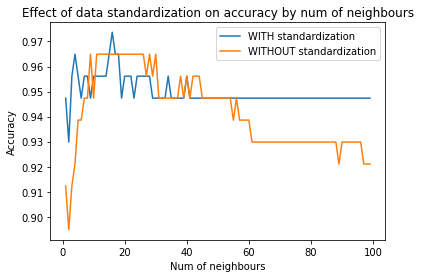

In [0]:
plt.plot(num_of_neighbours, accuracies, label='WITH standardization')
plt.plot(num_of_neighbours_without_scaling, accuracies_without_scaling, label='WITHOUT standardization')

plt.xlabel("Num of neighbours")
plt.ylabel("Accuracy")

plt.title("Effect of data standardization on accuracy by num of neighbours")
plt.legend()

In [0]:
X_train

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
338,10.050,17.53,64.41,310.8,0.10070,0.07326,0.02511,0.01775,0.1890,0.06331,0.2619,2.0150,1.778,16.85,0.007803,0.014490,0.01690,0.008043,0.02100,0.002778,11.160,26.84,71.98,384.0,0.14020,0.14020,0.1055,0.06499,0.2894,0.07664
427,10.800,21.98,68.79,359.9,0.08801,0.05743,0.03614,0.01404,0.2016,0.05977,0.3077,1.6210,2.240,20.20,0.006543,0.021480,0.02991,0.010450,0.01844,0.002690,12.760,32.04,83.69,489.5,0.13030,0.16960,0.1927,0.07485,0.2965,0.07662
406,16.140,14.86,104.30,800.0,0.09495,0.08501,0.05500,0.04528,0.1735,0.05875,0.2387,0.6372,1.729,21.83,0.003958,0.012460,0.01831,0.008747,0.01500,0.001621,17.710,19.58,115.90,947.9,0.12060,0.17220,0.2310,0.11290,0.2778,0.07012
96,12.180,17.84,77.79,451.1,0.10450,0.07057,0.02490,0.02941,0.1900,0.06635,0.3661,1.5110,2.410,24.44,0.005433,0.011790,0.01131,0.015190,0.02220,0.003408,12.830,20.92,82.14,495.2,0.11400,0.09358,0.0498,0.05882,0.2227,0.07376
490,12.250,22.44,78.18,466.5,0.08192,0.05200,0.01714,0.01261,0.1544,0.05976,0.2239,1.1390,1.577,18.04,0.005096,0.012050,0.00941,0.004551,0.01608,0.002399,14.170,31.99,92.74,622.9,0.12560,0.18040,0.1230,0.06335,0.3100,0.08203
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
277,18.810,19.98,120.90,1102.0,0.08923,0.05884,0.08020,0.05843,0.1550,0.04996,0.3283,0.8280,2.363,36.74,0.007571,0.011140,0.02623,0.014630,0.01930,0.001676,19.960,24.30,129.00,1236.0,0.12430,0.11600,0.2210,0.12940,0.2567,0.05737
9,12.460,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,0.2976,1.5990,2.039,23.94,0.007149,0.072170,0.07743,0.014320,0.01789,0.010080,15.090,40.68,97.65,711.4,0.18530,1.05800,1.1050,0.22100,0.4366,0.20750
359,9.436,18.32,59.82,278.6,0.10090,0.05956,0.02710,0.01406,0.1506,0.06959,0.5079,1.2470,3.267,30.48,0.006836,0.008982,0.02348,0.006565,0.01942,0.002713,12.020,25.02,75.79,439.6,0.13330,0.10490,0.1144,0.05052,0.2454,0.08136
192,9.720,18.22,60.73,288.1,0.06950,0.02344,0.00000,0.00000,0.1653,0.06447,0.3539,4.8850,2.230,21.69,0.001713,0.006736,0.00000,0.000000,0.03799,0.001688,9.968,20.83,62.25,303.8,0.07117,0.02729,0.0000,0.00000,0.1909,0.06559


**We can see that by standardizing data we can achieve materially higher accuracy.**

By comparing the two plots we can see that 
If we normalize data, the range of the values becomes more contained and the values are rescaled based on the mean and the standard deviation of the distribution. This helps getting rid of outliers and comparing distributions that represent behaviour rather than scattered data points. 